# Connect to comet

In [1]:
# # import comet_ml at the top of your file
# from comet_ml import Experiment

# # Create an experiment with your api key
# experiment = Experiment(
#     api_key="ZMIjNBttB9ueClB4Ovm4gHOsa",
#     project_name="thesis-test1-parallel",
#     workspace="loesverhaeghe",
#     log_code=True,
#     auto_metric_logging=True,
#     auto_param_logging=True,
#     log_graph=True,
#     auto_metric_step_rate=True,
#     parse_args=True,
#     auto_histogram_weight_logging=True,
#     auto_histogram_gradient_logging=True,
#     auto_histogram_activation_logging=True,
#     auto_histogram_epoch_rate=True,
# )


# Run model in WEST

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import pandas as pd

import subprocess

import plotly.tools as tls
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly
import plotly.graph_objs as go

import math  
import sklearn.metrics 

In [3]:
# # note: don't change any double backslashes (\\) to slashes (\) when you copy your local paths instead of the ones here
# # so if your local path is C:\model\project in this file you should put it as C:\\model\\project

# # this is the path to the West installation files
# path_to_west = "C:\\Program Files (x86)\\DHI\\WEST\\2022"

# # this is the path to the West project, the batch file should be created in the same directory as model files
# path_to_project = "C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\\data\\projects\\data_gamze - ORIGINEEL\\pilEAUte model_Oct2022\\pilEAUte_model_ver04"

# # this will read all .Dynamic.ObjEval.Exp.xml files in your directory and make a list out of their names
# # useful if you have multiple of them for more scenarios (if you use scenarios withh different parameters for example)
# # the assumption is that you have already gone through the procedure for making .Dynamic.ObjEval.Exp.xml files 
# # for scenarios based on the parameters that need to be changed
# exp_filenames = []
# for files in os.listdir(path_to_project):
#     if files.endswith(".Dynamic.ObjEval.Exp.xml"):
#             exp_filenames.append(files)

# # print to see if it works
# print(exp_filenames) 

# # here the batch file will be created
# windows_batch_file = os.path.join(path_to_project, "run_model.bat")        

# # open the batch file and write the lines inside it
# fbat = open(windows_batch_file, "w")
# fbat.write("SET INCLUDE=%INCLUDE%;"+path_to_west+"\include\n")
# fbat.write("SET LIB=%LIB%;"+path_to_west+"\lib\win32-msvc\n")
# fbat.write("SET PATH="+path_to_west+"\\bin;"+path_to_west+"\\third_party\\bcc5.5\Bin;%PATH%\n")
# fbat.write("SET TORNADO_CC_PLATFORM=win32-bcc5.5\n")
# fbat.write("SET TORNADO_CC_PATH="+path_to_west+"\\third_party\\bcc5.5\n")
# fbat.write("SET TORNADO_DATA_PATH=C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\n")
# fbat.write("SET TORNADO_ROOT_PATH="+path_to_west+"\n")
# fbat.write("SET OPENMODELICAHOME="+path_to_west+"\\bin\n")

# # up to here, the previous lines are for your machine to know where tornado files are stored

In [4]:
##########################################################################
# read this part only if you need to use tbuild command 
# for creating model files to run on linux (like for running on a cluster)
##########################################################################

# example for tbuild command, xxx is the path to the model block library, 
# you should keep External\External at the end of this path, just change the previous part 
# for example it should be something like this: C:\example\blocks\MSL\External\External
# _ProjectName_ is only the name of the project and not the complete path, the complete
# path is not required since you are already in the directory of the project

# fbat.write("tbuild -S C:\\Users\\sdaneshg\\OneDrive - UGent\\Desktop\\WEST_model_latest update\\WEST_model\\WEST\\data\\blocks\\WESTforKALLISTO - InfluentModel\\External\\External -B ”” _Influent_ > tbuild.log\n")

In [5]:

# ##########################################################################
# # this part is realted to using texec for running simulations
# ##########################################################################

# # EXPLANATION if you need to run tbuild first 
# # when you first run this batch script, keep this line as a comment
# # you need to run the tbuild first
# # after you run this with tbuild command successfully then open this file again
# # and comment the fbat.write("tbuild...") line and uncomment the line below
# # then run the script again to create batch file fo simulations

# # log_filename is the name of the log file (with .log extension) that you choose to save
# # exp_filename is the .Dynamic.ObjEval.Exp.xml file you have in your project directory
# # these two should be only names and not full path, you don't need the full path here
# # output_name_orig is the name of the output file you choose to save in WEST environment
# # this should work even if you have multiple ObjEval files for example: scen_1.Dynamic.ObjEval.Exp.xml, scen_2.Dynamic.ObjEval.Exp.xml , ...
# # this will create a texec command for each scenario to run and then rename the output file accordingly 
# # so they will not be overwritten

# output_name_orig = "testausel25_06.Dynamic.Simul.1.out.testLoes.txt" # this is how I named the output file created in WEST

# # This writes the lines to create the log-file and run the model
# for f in exp_filenames:
#     log_filename = f.split('.')[0] + ".log"
#     new_output_name = f.split('.')[0] + ".out.txt"
#     fbat.write("texec -l \"" + log_filename  + "\" \"" + f+"\"\n")
#     fbat.write("ren \"" + output_name_orig + "\" \"" + new_output_name +"\"\n")

# # write exit and close the file
# fbat.write("EXIT")
# fbat.close()

In [6]:
# When you use parallel model this doesn't have to be run everytime

# # run the command line of your computer inside python to run the batch file
# # this might take a while as the model runs
# os.chdir(path_to_project)
# p = subprocess.Popen("run_model.bat" , shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
# p.communicate()            

In [7]:
# define a function that can interpolate the data to the measurement data time points
def interp(df, new_index):
    """Return a new DataFrame with all columns values interpolated to the new_index values."""
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col)

    return df_out

# Import measurement data 

In [8]:
interpol_index=np.linspace(0,58.9208, num=8352) # every 10 minutes
interpol_index

array([0.00000000e+00, 7.05553826e-03, 1.41110765e-02, ...,
       5.89066889e+01, 5.89137445e+01, 5.89208000e+01])

In [9]:
# set the path the the data file in my computer
measured_data_path="C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\\data\\projects\\data_gamze - ORIGINEEL\\pilEAUte model_Oct2022\\InputOutput\\Measured_data_5_tank_model_rev2.txt"

# read the file and delete unwanted columns
measured_data=pd.read_csv(measured_data_path, sep="\t", header=[2], low_memory=False)
measured_data=measured_data.drop(0)
measured_data=measured_data.drop(1)
measured_data=measured_data.set_index('t')
measured_data = measured_data.astype(float)

measured_data=interp(measured_data, interpol_index)

display(measured_data)

.ASU_2.X_TSS  .SST_1.X_Under  .ASU_4.C(S_O)       Temp  \
t                                                                   
0.000000    3136.849400     6256.418700       3.000000  20.290100   
0.007056    3136.869454     6256.418700       3.000000  20.296348   
0.014111    3128.331916     6256.418700       3.000000  20.301719   
0.021167    3126.789291     6256.418700       3.000000  20.306691   
0.028222    3130.675766     6258.759449       3.000000  20.310339   
...                 ...             ...            ...        ...   
58.892578   1229.154052     2956.535141       2.995540  17.991867   
58.899633   1227.908619     2944.561855       2.999213  17.997647   
58.906689   1234.572933     2943.567400       2.994865  18.000137   
58.913744   1232.592945     2943.567400       3.010133  18.004611   
58.920800   1231.355200     2943.567400       3.000000  18.010000   

           .Qair_Basin_4  .SST_1.C(S_NH)(1)  .SST_1.C(S_NO3)(1)  .SST_1.X_Out  
t                                                                              
0.000000      331.000000                0.1            6.995200      0.000000  
0.007056      328.009672                0.1            6.994067      0.000000  
0.014111      326.718397                0.1            7.000284      0.000000  
0.021167      324.633852                0.1            6.992770      0.000000  
0.028222      321.077595                0.1            6.973500      0.000000  
...                  ...                ...                 ...           ...  
58.892578     101.933630                0.0            0.000000      4.650252  
58.899633     101.000000                0.0            0.000000      4.345851  
58.906689     102.000000                0.0            0.000000      4.582997  
58.913744     103.000000                0.0            0.000000      4.450278  
58.920800     102.000000                0.0            0.000000      4.440300  

[8352 rows x 8 columns]

In [10]:
# # quick look at the measurement data
# measured_data.iplot(kind='scatter',filename='cufflinks/simple-scatter',mode='lines', size=4,legend=True)

# Import mechanistic model outputs 

In [11]:
# Set path to files
output_name=r"C:\Users\Public\Documents\DHI\WEST\2022\data\projects\data_gamze - ORIGINEEL\pilEAUte model_Oct2022\pilEAUte_model_ver04\testausel25_06.out_nieuwetest.txt"

# Import files
mech_model_output_data=pd.read_csv(output_name, sep="\t",header=[0], low_memory=False)
mech_model_output_data=mech_model_output_data.drop(0)
mech_model_output_data=mech_model_output_data.drop(mech_model_output_data.index[-1])
mech_model_output_data=mech_model_output_data.set_index('#.t')
mech_model_output_data = mech_model_output_data.astype(float)

# interpolate the mechanistic output data to the timesteps of the measured data
mech_model_output_data=interp(mech_model_output_data, interpol_index)

display(mech_model_output_data)

.ASU_2.X_TSS  .ASU_4.C(S_O)  .Qair_Basin_4  .SST_1.C(S_NH)(1)  \
#.t                                                                        
0.000000    2262.953200       3.000153      94.970918           0.242932   
0.007056    2262.409742       2.211630     249.954050           0.242934   
0.014111    2261.507608       2.193822     260.536726           0.242932   
0.021167    2260.596888       2.206032     265.364644           0.242924   
0.028222    2260.069914       2.213453     271.013973           0.242909   
...                 ...            ...            ...                ...   
58.892578   2069.616596       2.977911     213.549330           0.245944   
58.899633   2069.654676       2.977599     213.807363           0.244234   
58.906689   2069.694820       2.977274     214.070675           0.242527   
58.913744   2069.737026       2.976942     214.338334           0.240838   
58.920800   2069.781700       2.976604     214.612060           0.239181   

           .SST_1.C(S_NO3)(1)  .SST_1.X_Out  .SST_1.X_Under  
#.t                                                          
0.000000             8.170881      6.395013     4375.893200  
0.007056             8.170891      6.395038     4375.935987  
0.014111             8.170894      6.395066     4381.122029  
0.021167             8.170889      6.395309     4401.119428  
0.028222             8.170877      6.396849     4428.098425  
...                       ...           ...             ...  
58.892578            3.749138      8.009434     4102.389164  
58.899633            3.747658      8.009518     4102.441812  
58.906689            3.744804      8.009628     4102.499276  
58.913744            3.740690      8.009756     4102.560373  
58.920800            3.735430      8.009898     4102.626500  

[8352 rows x 7 columns]

In [12]:
# # quick look at the data
# mech_model_output_data.iplot(kind='scatter',filename='cufflinks/simple-scatter',mode='lines', size=4,legend=True)

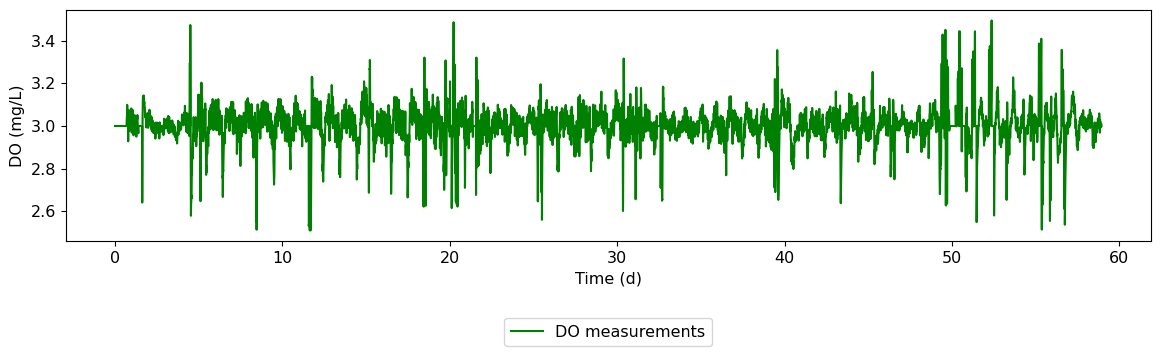

In [390]:
import matplotlib.pyplot as plt

mech=mech_model_output_data
measured=measured_data

plt.rcParams.update({'font.size': 11.5})

figure(figsize=(14,3))
plt.plot(measured['.ASU_4.C(S_O)'], 'g', label='DO measurements')
plt.ylabel('DO (mg/L)')
plt.xlabel('Time (d)')1.3
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=1)
plt.show()

## Compare measurement and output mechanistic model

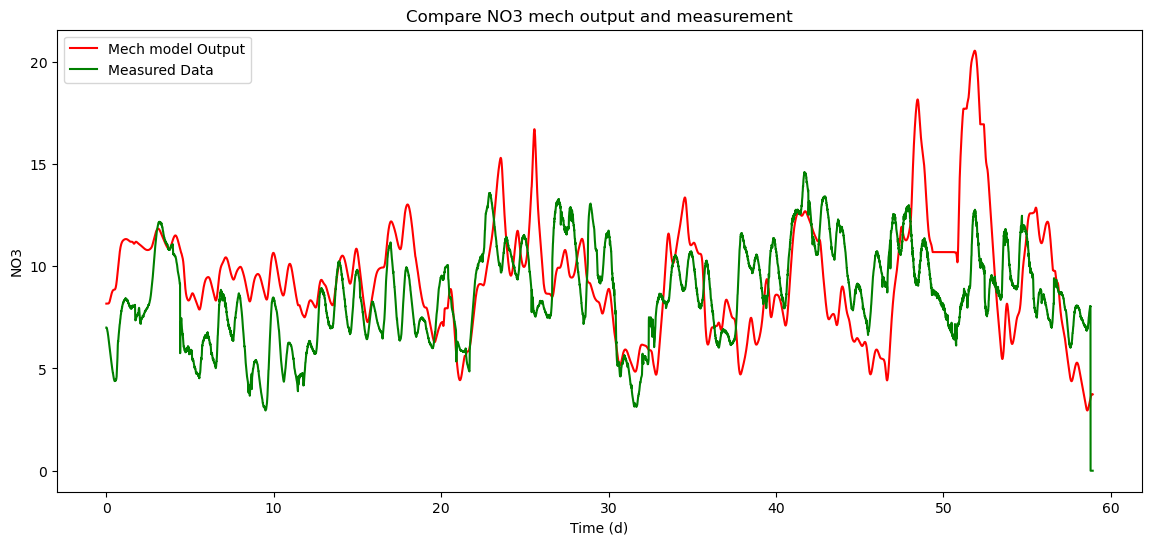

In [13]:
import matplotlib.pyplot as plt

mech=mech_model_output_data
measured=measured_data

figure(figsize=(14,6))
plt.plot(mech['.SST_1.C(S_NO3)(1)'], color='r', label='Mech model Output')
plt.plot(measured['.SST_1.C(S_NO3)(1)'], 'g', label='Measured Data')
plt.ylabel('NO3')
plt.xlabel('Time (d)')
plt.legend(loc='best')
plt.title('Compare NO3 mech output and measurement')
plt.show()

#  Import influent data (fractionated)


In [14]:
# Set path to file
influent_data_path=r"C:\Users\Hoofdgebruiker\THESIS\influent_variabelen_doorGamzegesmooth.txt"

# Import file
influent_data0=pd.read_csv(influent_data_path, sep="\t", header=[0])
influent_data0=influent_data0.set_index('tijd(d)')
influent_data0 = influent_data0.astype(float)

# interpolate the influent data to the timesteps of the measured data
influent_data0=interp(influent_data0, interpol_index)

# Set path to file
Qair_data_path="C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\\data\\projects\\data_gamze - ORIGINEEL\\pilEAUte model_Oct2022\\nieuwe_data_Loes\\Qair.txt"

# Import file
Qair_data=pd.read_csv(Qair_data_path, sep="\t", header=[2])
Qair_data=Qair_data.drop(0)
Qair_data=Qair_data.drop(1)
Qair_data=Qair_data.set_index('t ')
Qair_data = Qair_data.astype(float)

# interpolate the influent data to the timesteps of the measured data
Qair_data=interp(Qair_data, interpol_index)

# Set path to file
temp_data_path=data_filepath=r"C:\Users\Hoofdgebruiker\Development\data_filters\data\influent_data_Temp_filtered.csv"

# Import file
temp_data=pd.read_csv(temp_data_path, header=[0])['smoothed']
temp_data=np.array(temp_data.interpolate(method='linear', limit_direction='both'))

# create the training dataset: I used all the influent data plus the error in this script
influent_data=influent_data0.copy()
influent_data.insert(0, 'Qair', Qair_data)
influent_data.insert(0, 'Temp', temp_data)
display(influent_data)

Temp        Qair  CODs_prim_infl  NH4_prim_infl  \
tijd(d)                                                           
0.000000   20.301446  331.000000      147.168229      54.214033   
0.007056   20.301446  325.240122      145.926208      53.996000   
0.014111   20.301446  324.853530      143.419752      53.729801   
0.021167   20.307025  321.373821      141.858808      53.321340   
0.028222   20.312737  319.786870      141.456084      52.863486   
...              ...         ...             ...            ...   
58.892578  17.954180  102.312099      194.531516      21.189862   
58.899633  17.956967  103.832428      194.531516      21.189862   
58.906689  17.960114  103.264108      194.531516      21.189862   
58.913744  17.960114  102.000000      194.531516      21.189862   
58.920800  17.960114  103.000000      194.531516      21.189862   

           CODt_prim_infl  TSS_prim_infl  pH_prim_infl  
tijd(d)                                                 
0.000000       396.877641      82.196048      7.550000  
0.007056       388.654770      83.089431      7.539400  
0.014111       381.349876      81.713018      7.532199  
0.021167       378.993129      81.472128      7.509301  
0.028222       376.778210      80.734739      7.517699  
...                   ...            ...           ...  
58.892578      312.157207      49.569675      7.440000  
58.899633      312.157207      49.569675      7.440000  
58.906689      312.157207      49.569675      7.440000  
58.913744      312.157207      49.569675      7.440000  
58.920800      312.157207      49.569675      7.440000  

[8352 rows x 7 columns]

In [15]:
influent_data.iplot(kind='scatter',filename='cufflinks/simple-scatter',mode='lines', size=4,legend=True)

# Test 1: NO3 prediction

## Prepare the data for model input

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.optimizers import Adam, SGD 

import tensorflow as tf
from tensorflow import keras
import keras_tuner

In [17]:
# Create error = error that the mechanistic model makes at each timestep
error_for_training=measured_data['.SST_1.C(S_NO3)(1)']-mech_model_output_data['.SST_1.C(S_NO3)(1)']
error_for_training.describe()

count    8352.000000
mean       -0.782577
std         2.981564
min       -10.313942
25%        -2.921646
50%        -0.874860
75%         1.468913
max         6.836230
Name: .SST_1.C(S_NO3)(1), dtype: float64

In [18]:
# create the training dataset: I used all the influent data
df_for_training=influent_data.copy()
df_for_training.insert(0, 'error', error_for_training)
NO3=mech_model_output_data['.SST_1.C(S_NO3)(1)']
df_for_training.insert(1, 'NO3', NO3)
display(df_for_training)

error       NO3       Temp        Qair  CODs_prim_infl  \
tijd(d)                                                                
0.000000  -1.175681  8.170881  20.301446  331.000000      147.168229   
0.007056  -1.176824  8.170891  20.301446  325.240122      145.926208   
0.014111  -1.170611  8.170894  20.301446  324.853530      143.419752   
0.021167  -1.178119  8.170889  20.307025  321.373821      141.858808   
0.028222  -1.197377  8.170877  20.312737  319.786870      141.456084   
...             ...       ...        ...         ...             ...   
58.892578 -3.749138  3.749138  17.954180  102.312099      194.531516   
58.899633 -3.747658  3.747658  17.956967  103.832428      194.531516   
58.906689 -3.744804  3.744804  17.960114  103.264108      194.531516   
58.913744 -3.740690  3.740690  17.960114  102.000000      194.531516   
58.920800 -3.735430  3.735430  17.960114  103.000000      194.531516   

           NH4_prim_infl  CODt_prim_infl  TSS_prim_infl  pH_prim_infl  
tijd(d)                                                                
0.000000       54.214033      396.877641      82.196048      7.550000  
0.007056       53.996000      388.654770      83.089431      7.539400  
0.014111       53.729801      381.349876      81.713018      7.532199  
0.021167       53.321340      378.993129      81.472128      7.509301  
0.028222       52.863486      376.778210      80.734739      7.517699  
...                  ...             ...            ...           ...  
58.892578      21.189862      312.157207      49.569675      7.440000  
58.899633      21.189862      312.157207      49.569675      7.440000  
58.906689      21.189862      312.157207      49.569675      7.440000  
58.913744      21.189862      312.157207      49.569675      7.440000  
58.920800      21.189862      312.157207      49.569675      7.440000  

[8352 rows x 9 columns]

In [19]:
# Split the dataset
# trainX_temp=df_for_training[33120:66241] # calibration dataset Gamze
# validationX_temp=df_for_training[66240:76240] # half of the validation dataset Gamze
# testX_temp=df_for_training[76240:] # half of the validation dataset Gamze

tr1=24
tr2=42

v1=42
v2=47

te1=47
te2=59

trainX_temp=df_for_training.loc[tr1:tr2] #calib and half of valid
validationX_temp=df_for_training.loc[v1:v2] 
testX_temp=df_for_training.loc[te1:te2] 

trainX_temp

error        NO3       Temp        Qair  CODs_prim_infl  \
tijd(d)                                                                 
24.002941  0.750796  10.256451  19.486954  249.246828      127.977020   
24.009997  0.828038  10.201462  19.490897  260.219037      127.645446   
24.017052  0.834980  10.147978  19.494753  258.644788      127.993689   
24.024108  0.845375  10.096081  19.498695  263.000000      127.569677   
24.031163  0.837031  10.045869  19.501951  263.324833      126.775750   
...             ...        ...        ...         ...             ...   
41.966342  0.846165  12.312857  19.679566  333.174084      133.070127   
41.973397  0.793515  12.299569  19.687201  345.700663      132.175517   
41.980453  0.816020  12.286436  19.694924  342.000000      133.110078   
41.987508  0.903810  12.273380  19.702403  347.813532      133.588864   
41.994564  0.845919  12.260340  19.710136  340.784746      133.422933   

           NH4_prim_infl  CODt_prim_infl  TSS_prim_infl  pH_prim_infl  
tijd(d)                                                                
24.002941      52.559657      349.184087      88.632796      7.332971  
24.009997      53.005579      351.241331      90.784837      7.339429  
24.017052      53.526016      350.657109      89.423738      7.323620  
24.024108      54.006986      351.795534      88.178715      7.350380  
24.031163      54.480475      354.207565      90.591979      7.306745  
...                  ...             ...            ...           ...  
41.966342      74.375649      352.135419      86.752458      7.422159  
41.973397      75.008268      351.866813      86.705044      7.437041  
41.980453      75.636633      349.698256      85.134094      7.433759  
41.987508      75.845856      347.043161      84.537305      7.435441  
41.994564      75.533328      345.630362      84.577059      7.435359  

[2551 rows x 9 columns]

In [20]:
# Scale the datasets, here I only scaled the influent data, not the error
scaler1=StandardScaler()
train_transformed=scaler1.fit_transform(trainX_temp.loc[:, trainX_temp.columns!= 'error'])
scaler2=StandardScaler()
val_transformed=scaler2.fit_transform(validationX_temp.loc[:, validationX_temp.columns!= 'error']) 
scaler3=StandardScaler()
test_transformed=scaler3.fit_transform(testX_temp.loc[:, testX_temp.columns!= 'error']) 

trainX_scaled=np.append(np.asarray(trainX_temp['error']).reshape(len(trainX_temp),1), train_transformed, axis=1).reshape(len(trainX_temp),df_for_training.shape[1])
validationX_scaled=np.append(np.asarray(validationX_temp['error']).reshape(len(validationX_temp),1), val_transformed, axis=1).reshape(len(validationX_temp),df_for_training.shape[1])
testX_scaled=np.append(np.asarray(testX_temp['error']).reshape(len(testX_temp),1), test_transformed, axis=1).reshape(len(testX_temp),df_for_training.shape[1])

In [21]:
# Prepare traindata for training
trainX=[]
trainY=[]

n_past=30 # how much data point do you look back to make your next prediction

for i in range(n_past, len(trainX_scaled)):
    trainX.append(trainX_scaled[i-n_past:i, 1:]) # so here I did not include the errors in the training dataset
    trainY.append(trainX_scaled[i:i+1,0])
    
trainX, trainY = np.array(trainX), np.array(trainY)

# Check the shape of the traindata
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape)) # the first line of data doesn't get predicted

trainX shape == (2521, 30, 8).
trainY shape == (2521, 1).


In [22]:
# Prepare validationdataset
validationX=[]
validationY=[]

for i in range(n_past, len(validationX_scaled)):
    validationX.append(validationX_scaled[i-n_past:i, 1:]) #don't include the predicted error
    validationY.append(validationX_scaled[i:i+1,0]) # je begint dus pas te voorspellen op de n_past-ste plaats
    
validationX, validationY = np.array(validationX), np.array(validationY)

# Check the shape of the validation datasets
print('validationX shape == {}.'.format(validationX.shape))
print('validationY shape == {}.'.format(validationY.shape))

# dus validationX[0] ingeven geeft een predictie van de lijn die zal bijgevoegd worden als laatste bij validationX[1]

validationX shape == (679, 30, 8).
validationY shape == (679, 1).


In [23]:
# Prepare validationdataset
testX=[]
testY=[]

for i in range(n_past, len(testX_scaled)):
    testX.append(testX_scaled[i-n_past:i, 1:]) #don't include the predicted error
    testY.append(testX_scaled[i:i+1,0]) # je begint dus pas te voorspellen op de n_past-ste plaats
    
testX, testY = np.array(testX), np.array(testY)

# Check the shape of the validation datasets
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))


testX shape == (1660, 30, 8).
testY shape == (1660, 1).


## Model training

In [360]:
model=Sequential()
model.add(LSTM(units=8, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [361]:
# Train the model
history=model.fit(x=trainX, y=trainY, validation_data=(validationX, validationY), epochs=90, batch_size=64, shuffle=False, verbose=1)

Epoch 1/90
40/40 [==============================] - 2s 15ms/step - loss: 2.0215 - val_loss: 2.9827
Epoch 2/90
40/40 [==============================] - 0s 9ms/step - loss: 1.9668 - val_loss: 2.9605
Epoch 3/90
40/40 [==============================] - 0s 9ms/step - loss: 1.9406 - val_loss: 2.9508
Epoch 4/90
40/40 [==============================] - 0s 9ms/step - loss: 1.9106 - val_loss: 2.9422
Epoch 5/90
40/40 [==============================] - 0s 9ms/step - loss: 1.8967 - val_loss: 2.9324
Epoch 6/90
40/40 [==============================] - 0s 10ms/step - loss: 1.8751 - val_loss: 2.9273
Epoch 7/90
40/40 [==============================] - 0s 10ms/step - loss: 1.8667 - val_loss: 2.9189
Epoch 8/90
40/40 [==============================] - 0s 10ms/step - loss: 1.8374 - val_loss: 2.9044
Epoch 9/90
40/40 [==============================] - 0s 9ms/step - loss: 1.8208 - val_loss: 2.8925
Epoch 10/90
40/40 [==============================] - 0s 10ms/step - loss: 1.8136 - val_loss: 2.8719
Epoch 11/90
40

40/40 [==============================] - 0s 9ms/step - loss: 0.9778 - val_loss: 2.3947
Epoch 84/90
40/40 [==============================] - 0s 11ms/step - loss: 0.9578 - val_loss: 2.3493
Epoch 85/90
40/40 [==============================] - 0s 12ms/step - loss: 0.9746 - val_loss: 2.3970
Epoch 86/90
40/40 [==============================] - 0s 11ms/step - loss: 0.9670 - val_loss: 2.4138
Epoch 87/90
40/40 [==============================] - 0s 9ms/step - loss: 0.9547 - val_loss: 2.3249
Epoch 88/90
40/40 [==============================] - 0s 10ms/step - loss: 0.9530 - val_loss: 2.4432
Epoch 89/90
40/40 [==============================] - 0s 10ms/step - loss: 0.9474 - val_loss: 2.3146
Epoch 90/90
40/40 [==============================] - 0s 10ms/step - loss: 0.9480 - val_loss: 2.4525


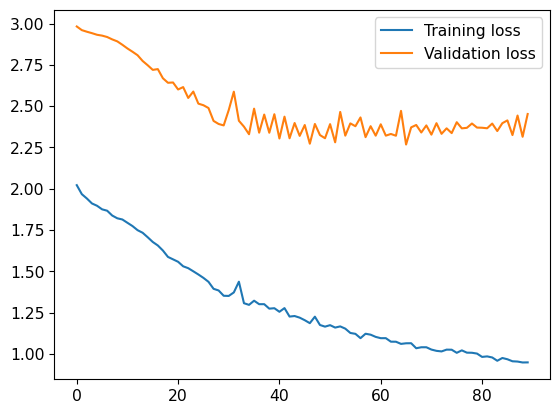

In [362]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

## Training data prediction

### Make predictions of the error

In [363]:
predictions=model.predict(trainX)

79/79 [==============================] - 0s 3ms/step


In [364]:
predictions.shape

(2521, 1)

### Add predicted error to output mechanistic model

In [365]:
# Select the NO3 mechanistic model output for the training period
output_NO3=mech_model_output_data['.SST_1.C(S_NO3)(1)']
training_mech_output_NO3=output_NO3.loc[tr1:tr2] # first one not included because this doesn't get predicted 
training_mech_output_NO3=np.array(training_mech_output_NO3.iloc[n_past:])

# Add predicted error to output mechanistic model
training_hybrid_output_NO3=np.asarray(predictions).reshape(len(predictions),)+ training_mech_output_NO3

# Select the measured NO3 for the training period
training_measured_NO3=measured_data['.SST_1.C(S_NO3)(1)'].loc[tr1:tr2]
training_measured_NO3=np.array(training_measured_NO3.iloc[n_past:])

### Check results training dataset prediction

Text(0.5, 1.0, 'Training prediction results')

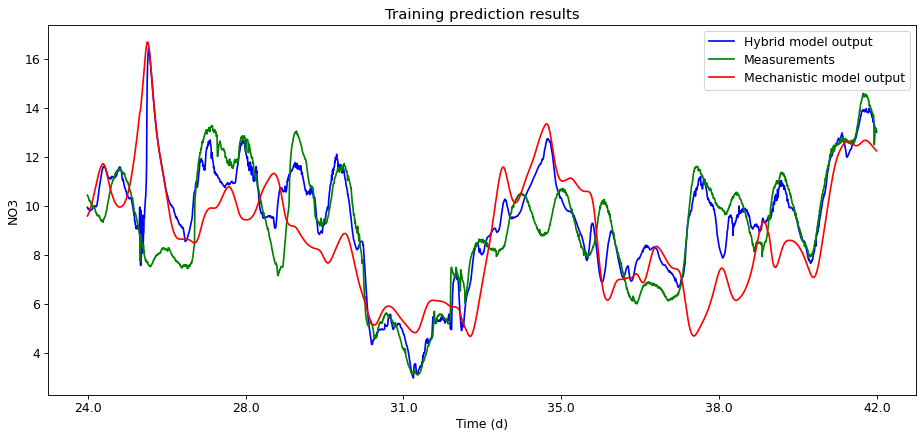

In [366]:
figure(figsize=(14, 6), dpi=80)
plt.plot(training_hybrid_output_NO3,'b',label='Hybrid model output')
plt.plot(training_measured_NO3, 'g', label='Measurements')
plt.plot(training_mech_output_NO3, 'r', label='Mechanistic model output')
plt.xticks(ticks=np.linspace(1,len(training_hybrid_output_NO3), 6) , labels=np.around(np.linspace(float(trainX_temp.index[1]), float(trainX_temp.index[-1]), 6)))
plt.legend()
plt.xlabel('Time (d)')
plt.ylabel('NO3')
plt.title('Training prediction results')


In [367]:
print('Training prediction results')
mse_hybrid_tr = sklearn.metrics.mean_squared_error(training_measured_NO3, training_hybrid_output_NO3)  
rmse_hybrid_tr = math.sqrt(mse_hybrid_tr)  

print("Hybrid model: MSE:", mse_hybrid_tr)
print("Hybrid model: RMSE:", rmse_hybrid_tr)  

mse_mech_tr = sklearn.metrics.mean_squared_error(training_measured_NO3, training_mech_output_NO3)  
rmse_mech_tr = math.sqrt(mse_mech_tr)  

print("Mechanistic model: MSE:", mse_mech_tr)
print("Mechanistic model: RMSE:", rmse_mech_tr)

Training prediction results
Hybrid model: MSE: 1.8921847389987096
Hybrid model: RMSE: 1.3755670608875126
Mechanistic model: MSE: 6.237352184319416
Mechanistic model: RMSE: 2.49746915582944


## Validation data prediction

### Make prediction of the errors

In [368]:
predictions_val=model.predict(validationX)

22/22 [==============================] - 0s 3ms/step


### Add predicted error to output mechanistic model

In [369]:
# Select the NO3 mechanistic model output for the validation period
output_NO3=mech_model_output_data['.SST_1.C(S_NO3)(1)']
validation_mech_output_NO3=output_NO3.loc[v1:v2] 
validation_mech_output_NO3=np.array(validation_mech_output_NO3.iloc[n_past:])

# Add predicted error to output mechanistic model
validation_hybrid_output_NO3=np.asarray(predictions_val).reshape(len(predictions_val),) + validation_mech_output_NO3

# Select the measured NO3 for the validation period
validation_measured_NO3=measured_data['.SST_1.C(S_NO3)(1)'][v1:v2]
validation_measured_NO3=np.array(validation_measured_NO3.iloc[n_past:])

### Check results validation dataset prediction

Text(0.5, 1.0, 'Validation period')

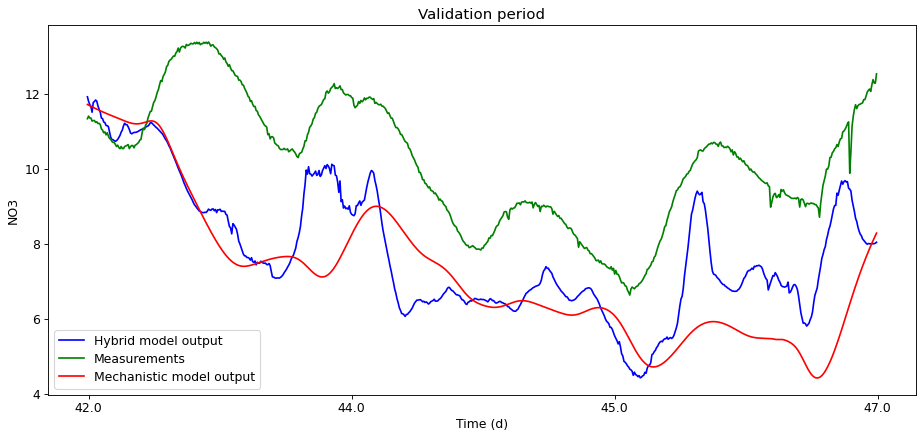

In [370]:
figure(figsize=(14, 6), dpi=80)

plt.plot(validation_hybrid_output_NO3,'b',label='Hybrid model output')
plt.plot(validation_measured_NO3, 'g', label='Measurements')
plt.plot(validation_mech_output_NO3, 'r', label='Mechanistic model output')
plt.xticks(ticks=np.linspace(1, len(validation_hybrid_output_NO3),4) , labels=np.around(np.linspace(float(validationX_temp.index[1]), float(validationX_temp.index[-1]), 4)))
plt.legend()
plt.xlabel('Time (d)')
plt.ylabel('NO3')
plt.title('Validation period')

# Experiment.log_figure(experiment,figure_name='validation results')

In [371]:
print('Validation results')
mse_hybrid_val = sklearn.metrics.mean_squared_error(validation_measured_NO3, validation_hybrid_output_NO3)  
rmse_hybrid_val = math.sqrt(mse_hybrid_val)  

print("Hybrid model: MSE:", mse_hybrid_val)
print("Hybrid model: RMSE:", rmse_hybrid_val)  

mse_mech_val = sklearn.metrics.mean_squared_error(validation_measured_NO3, validation_mech_output_NO3)  
rmse_mech_val = math.sqrt(mse_mech_val)  

print("Mechanistic model: MSE:", mse_mech_val)
print("Mechanistic model: RMSE:", rmse_mech_val)

Validation results
Hybrid model: MSE: 7.370076333157084
Hybrid model: RMSE: 2.7147884509031424
Mechanistic model: MSE: 11.410297063841485
Mechanistic model: RMSE: 3.377913122601214


## Test data prediction

### Make prediction of the errors

In [372]:
predictions_test=model.predict(testX)

52/52 [==============================] - 0s 4ms/step


### Add predicted error to output mechanistic model

In [373]:
# Select the NO3 mechanistic model output for the validation period
output_NO3=mech_model_output_data['.SST_1.C(S_NO3)(1)']
test_mech_output_NO3=output_NO3[te1:te2] 
test_mech_output_NO3=np.array(test_mech_output_NO3.iloc[n_past:])

# Add predicted error to output mechanistic model
test_hybrid_output_NO3=np.asarray(predictions_test).reshape(len(predictions_test) ,) + test_mech_output_NO3

# Select the measured NO3 for the validation period
test_measured_NO3=measured_data['.SST_1.C(S_NO3)(1)'][te1:te2]
test_measured_NO3=np.array(test_measured_NO3.iloc[n_past:])

### Check results test dataset prediction

Text(0.5, 1.0, 'Test period')

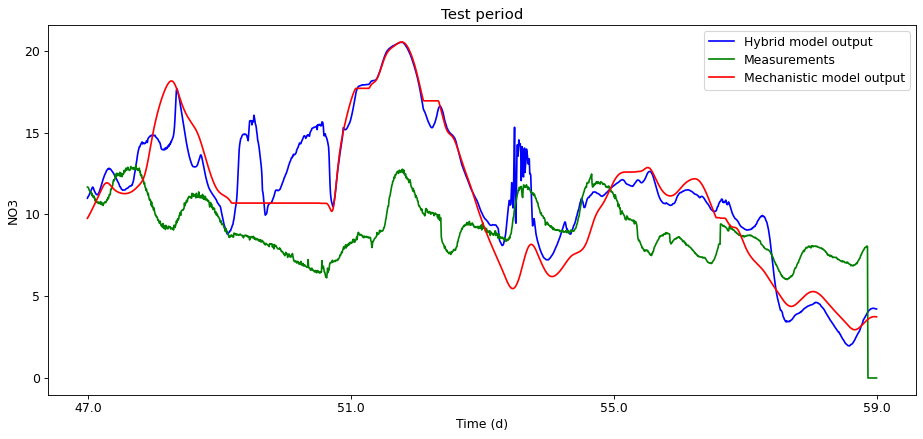

In [374]:
figure(figsize=(14, 6), dpi=80)

plt.plot(test_hybrid_output_NO3,'b',label='Hybrid model output')
plt.plot(test_measured_NO3, 'g', label='Measurements')
plt.plot(test_mech_output_NO3, 'r', label='Mechanistic model output')
plt.xticks(ticks=np.linspace(1,len(test_hybrid_output_NO3),4) , labels=np.around(np.linspace(float(testX_temp.index[1]), float(testX_temp.index[-1]), 4)))
plt.legend()
plt.xlabel('Time (d)')
plt.ylabel('NO3')
plt.title('Test period')

# Experiment.log_figure(experiment,figure_name='test results')

#eens kijken wat er gebeurt in de data
# christian sturen

In [375]:
print('test results')
mse_hybrid_te = sklearn.metrics.mean_squared_error(test_measured_NO3, test_hybrid_output_NO3)  
rmse_hybrid_te = math.sqrt(mse_hybrid_te)  

print("Hybrid model: MSE:", mse_hybrid_te)
print("Hybrid model: RMSE:", rmse_hybrid_te)  

mse_mech_te = sklearn.metrics.mean_squared_error(test_measured_NO3, test_mech_output_NO3)  
rmse_mech_te = math.sqrt(mse_mech_te)  

print("Mechanistic model: MSE:", mse_mech_te)
print("Mechanistic model: RMSE:", rmse_mech_te)

test results
Hybrid model: MSE: 20.110433457741514
Hybrid model: RMSE: 4.484465794020679
Mechanistic model: MSE: 19.07765668424781
Mechanistic model: RMSE: 4.367797692687678


In [376]:
# experiment.end()

# All results together

In [377]:
# Bestandsnamen van de opgeslagen arrays
training_file = "training_hybrid_output_NO3.npy"
validation_file = "validation_hybrid_output_NO3.npy"
test_file = "test_hybrid_output_NO3.npy"

# Heropenen van de arrays
EXP1_training_hybrid_output_NO3 = np.load(training_file)
EXP1_validation_hybrid_output_NO3 = np.load(validation_file)
EXP1_test_hybrid_output_NO3 = np.load(test_file)

(1.5, 21.0)

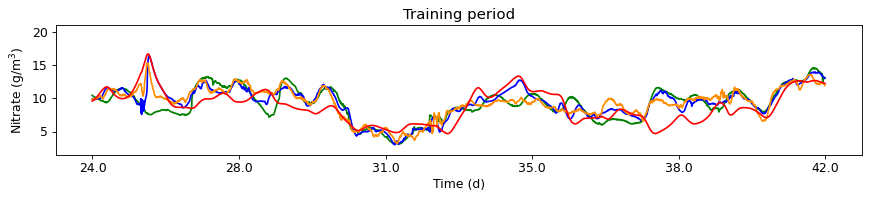

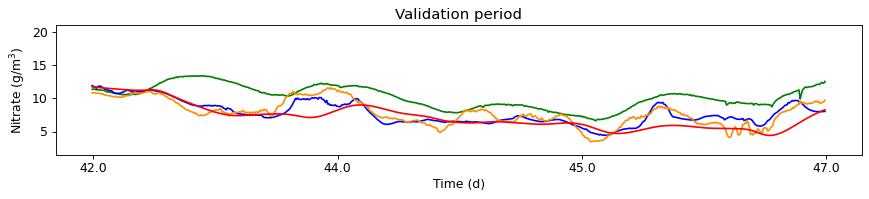

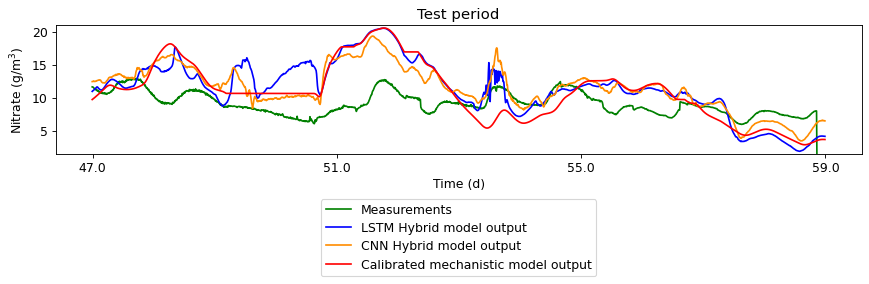

In [392]:
plt.rcParams.update({'font.size': 11.2})

figure(figsize=(13,2.1), dpi=80)
plt.plot(training_measured_NO3, 'g', label='Measurements')
plt.plot(training_hybrid_output_NO3,'b', label='Hybrid model output LSTM')
plt.plot(EXP1_training_hybrid_output_NO3,'darkorange', label='Hybrid model output CNN')
plt.plot(training_mech_output_NO3, 'r', label='Calibrated mechanistic model output')
plt.xticks(ticks=np.linspace(1,len(training_hybrid_output_NO3), 6) , labels=np.around(np.linspace(float(trainX_temp.index[1]), float(trainX_temp.index[-1]), 6)))
plt.xlabel('Time (d)')
plt.ylabel(r'Nitrate (g/m$^3$)')
plt.title('Training period')
plt.ylim([1.5,21])

figure(figsize=(13,2.1), dpi=80)
plt.plot(validation_measured_NO3, 'g', label='Measurements')
plt.plot(validation_hybrid_output_NO3,'b',label='Hybrid model output')
plt.plot(EXP1_validation_hybrid_output_NO3,'darkorange', label='Hybrid model output CNN')
plt.plot(validation_mech_output_NO3, 'r', label='Mechanistic model output with calibrated parameters')
plt.xticks(ticks=np.linspace(1, len(validation_hybrid_output_NO3),4) , labels=np.around(np.linspace(float(validationX_temp.index[1]), float(validationX_temp.index[-1]), 4)))
plt.xlabel('Time (d)')
plt.ylabel(r'Nitrate (g/m$^3$)')
plt.title('Validation period')
plt.ylim([1.5,21])

figure(figsize=(13,2.1), dpi=80)
plt.plot(test_measured_NO3, 'g', label='Measurements')
plt.plot(test_hybrid_output_NO3,'b',label='LSTM Hybrid model output')
plt.plot(EXP1_test_hybrid_output_NO3,'darkorange', label='CNN Hybrid model output')
plt.plot(test_mech_output_NO3, 'r', label='Calibrated mechanistic model output')
plt.xticks(ticks=np.linspace(1,len(test_hybrid_output_NO3),4) , labels=np.around(np.linspace(float(testX_temp.index[1]), float(testX_temp.index[-1]), 4)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=1)
plt.xlabel('Time (d)')
plt.ylabel(r'Nitrate (g/m$^3$)')
plt.title('Test period')
plt.ylim([1.5,21])


In [379]:
print('NO3: LSTM')
print('\nTraining prediction results')
mse_hybrid_tr = sklearn.metrics.mean_squared_error(training_measured_NO3, training_hybrid_output_NO3)  
rmse_hybrid_tr = math.sqrt(mse_hybrid_tr)  

print("Hybrid model: RMSE:", rmse_hybrid_tr)  

mse_mech_tr = sklearn.metrics.mean_squared_error(training_measured_NO3, training_mech_output_NO3)  
rmse_mech_tr = math.sqrt(mse_mech_tr) 

print("Mechanistic model: RMSE:", rmse_mech_tr)

#___________________________________________________________________________________

print('\nValidation results')
mse_hybrid_val = sklearn.metrics.mean_squared_error(validation_measured_NO3, validation_hybrid_output_NO3)  
rmse_hybrid_val = math.sqrt(mse_hybrid_val)  

print("Hybrid model: RMSE:", rmse_hybrid_val)  

mse_mech_val = sklearn.metrics.mean_squared_error(validation_measured_NO3, validation_mech_output_NO3)  
rmse_mech_val = math.sqrt(mse_mech_val)

print("Mechanistic model: RMSE:", rmse_mech_val)
#___________________________________________________________________________________

print('\nTest results')
mse_hybrid_te = sklearn.metrics.mean_squared_error(test_measured_NO3, test_hybrid_output_NO3)  
rmse_hybrid_te = math.sqrt(mse_hybrid_te)  

print("Hybrid model: RMSE:", rmse_hybrid_te)  

mse_mech_te = sklearn.metrics.mean_squared_error(test_measured_NO3, test_mech_output_NO3)  
rmse_mech_te = math.sqrt(mse_mech_te)

print("Mechanistic model: RMSE:", rmse_mech_te)


NO3: LSTM

Training prediction results
Hybrid model: RMSE: 1.3755670608875126
Mechanistic model: RMSE: 2.49746915582944

Validation results
Hybrid model: RMSE: 2.7147884509031424
Mechanistic model: RMSE: 3.377913122601214

Test results
Hybrid model: RMSE: 4.484465794020679
Mechanistic model: RMSE: 4.367797692687678
